In [1]:
#implementing coursera non linear least squares 3 minute 12:10

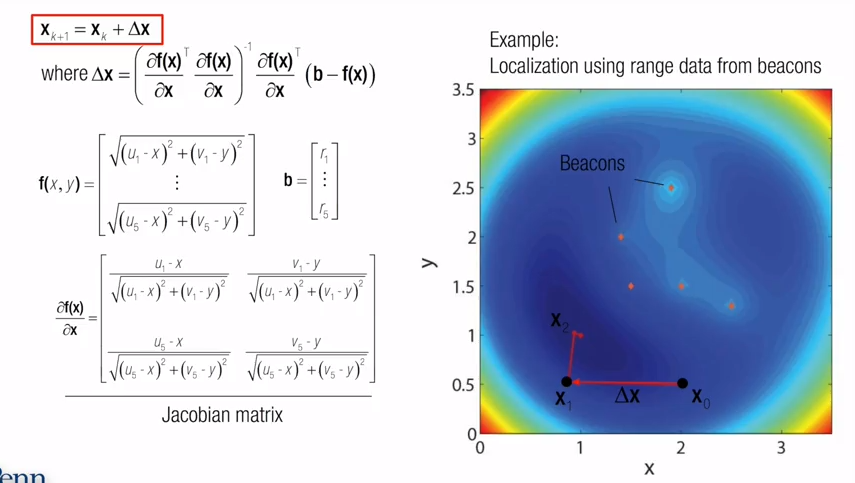

In [129]:
import numpy as np

def f(x, beacon_pos):
    """
        x          has shape 2x1
        beacon_pos has shape Nx2
    """
    distances = np.square(beacon_pos - x.T)
    distances = np.sum(distances,axis=1, keepdims=True)
    distances=  np.sqrt(distances)
    return distances

x_true = np.array([[1],[1]])
beacon_pos = np.array([[1.5, 2],
                     [1.6, 1.5],
                     [2, 1.5],
                     [1.9, 2.5],
                     [2.5, 1.4]])
b = f(x_true, beacon_pos)

print beacon_pos
print x_true
print b

[[1.5 2. ]
 [1.6 1.5]
 [2.  1.5]
 [1.9 2.5]
 [2.5 1.4]]
[[1]
 [1]]
[[1.11803399]
 [0.78102497]
 [1.11803399]
 [1.74928557]
 [1.55241747]]


In [130]:
def computeJ(beacon_pos, x):
    """
        x          has shape 2x1
        beacon_pos has shape Nx2
    """
    nominator = beacon_pos - x.T
    denominator = f(x, beacon_pos)
    J = np.divide(nominator, denominator)
    return J

x0 = np.array([[2],[0.5]])
J = computeJ(beacon_pos, x0)
    

In [131]:
def computeDX(J,b, fx):
    dx = (J.T.dot(J))
    dx = np.linalg.inv(dx)
    dx = dx.dot(J.T)
    dx = dx.dot(b - fx)
    return dx

dx = computeDX(J, b, f(x0, beacon_pos))
print dx

[[ 1.08562203]
 [-0.02181272]]


In [132]:
def optimise(beacon_pos, measured_distances):
    x0 = np.array([[2],[0.5]]) #or random initialisation
    for i in range(10):
        J = computeJ(beacon_pos, x0)
        dx = computeDX(J, measured_distances, f(x0, beacon_pos))
        x0 -= dx
    return x0

x_true = np.array([[2.0],[1.0]])
b = f(x_true, beacon_pos)
x = optimise(beacon_pos, b)
print "x     ", x.T
print "X_true", x_true.T
    

x      [[2. 1.]]
X_true [[2. 1.]]


In [133]:
x_true = np.array([[2.0],[1.0]])
b = f(x_true, beacon_pos)
#add noise to b
noise = np.random.rand(*(b.shape)).T
print "noise level", noise
b += noise.T * 0.11
x = optimise(beacon_pos, b)
print "x     ", x.T
print "X_true", x_true.T

noise level [[0.45156071 0.80403223 0.94957236 0.99829385 0.54701215]]
x      [[1.99450132 0.90464252]]
X_true [[2. 1.]]


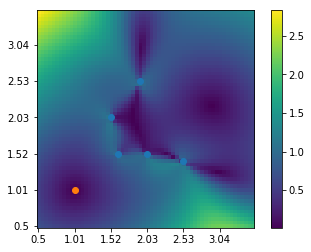

In [149]:
from matplotlib import pyplot as plt
#print beacons and gradient

m, n = 60, 60
min_x, max_x = 0.5, 3.5
min_y, max_y = 0.5, 3.5
x_axis = np.linspace(min_x, max_x, num=m)
y_axis = np.linspace(min_y, max_y, num=n)

x_true = np.array([[1.0],[1.0]])
b = f(x_true, beacon_pos)

grad_mag = np.zeros((m, n))
for idx_i, i in enumerate(y_axis):
    for idx_j, j  in enumerate(x_axis):
        x0 = np.array([[j],[i]])
        J = computeJ(beacon_pos, x0)
        dx = computeDX(J, b, f(x0, beacon_pos))
        grad_mag[idx_i,idx_j] = np.linalg.norm(dx)

plt.clf()
plt.imshow(grad_mag);
plt.gca().invert_yaxis()
plt.colorbar()

beacon_pos_scaled = beacon_pos.copy()
x_true_scaled = x_true.copy()

#scale beacon_pos to fit in the image
beacon_pos_scaled[:,0] = (((beacon_pos_scaled[:,0] - min_x) * (n)) / (max_x - min_x))
beacon_pos_scaled[:,1] = (((beacon_pos_scaled[:,1] - min_y) * (n)) / (max_y - min_y))
x_true_scaled[0,0] = (((x_true_scaled[0,0] - min_x) * (n)) / (max_x - min_x))
x_true_scaled[1,0] = (((x_true_scaled[1,0] - min_x) * (n)) / (max_x - min_x))

plt.scatter(beacon_pos_scaled[:,0], beacon_pos_scaled[:,1])
plt.scatter(x_true_scaled[0,0], x_true_scaled[1,0])

x_axis = np.round_(x_axis, 2)
y_axis = np.round_(y_axis, 2)
plt.xticks(range(0,x_axis.shape[0],10), x_axis[::10])
plt.yticks(range(0,y_axis.shape[0],10), y_axis[::10])

plt.show()

In [199]:
def optimiseAndGetSteps(beacon_pos, measured_distances, start_x, decrease_coef):
    x0 = start_x.copy()
    optimise_steps = 10
    x_list = np.zeros((2, optimise_steps + 1))
    x_list[:,[0]] =  x0
    for i in range(10):
        J = computeJ(beacon_pos, x0)
        dx = computeDX(J, measured_distances, f(x0, beacon_pos))
        x0 -= dx * decrease_coef
        x_list[:,[i +1]] = x0
    return x0, x_list

def computeGradientMagnitudeMap(m,n,y_axis, x_xis, beacon_pos):
    grad_mag = np.zeros((m, n))
    for idx_i, i in enumerate(y_axis):
        for idx_j, j  in enumerate(x_axis):
            x0 = np.array([[j],[i]])
            J = computeJ(beacon_pos, x0)
            dx = computeDX(J, b, f(x0, beacon_pos))
            grad_mag[idx_i,idx_j] = np.linalg.norm(dx)
    return grad_mag

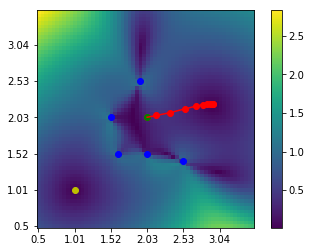

Gradient magnitude map


In [202]:
from matplotlib import pyplot as plt
#print beacons and gradient

#variables for gradient magnitude map
m, n = 60, 60
min_x, max_x = 0.5, 3.5
min_y, max_y = 0.5, 3.5
x_axis = np.linspace(min_x, max_x, num=m)
y_axis = np.linspace(min_y, max_y, num=n)

# initialise problem
x_true = np.array([[1.0],[1.0]])
b = f(x_true, beacon_pos)

# compute gradient map for current problem
grad_mag = computeGradientMagnitudeMap(m,n,y_axis, x_axis, beacon_pos)

# compute estimated_x and the intermediate x_list
start_x = np.array([[2.0],[2.0]])
x_computed, x_list = optimiseAndGetSteps(beacon_pos, b, start_x, decrease_coef = 0.5)

# plotting
plt.clf()
plt.imshow(grad_mag);
plt.gca().invert_yaxis()
plt.colorbar()

beacon_pos_scaled = beacon_pos.copy()
x_true_scaled = x_true.copy()
x_list_scaled =x_list.copy()

x_start_scaled = start_x.copy()

#scale beacon_pos to fit in the image
beacon_pos_scaled[:,0] = (((beacon_pos_scaled[:,0] - min_x) * (n)) / (max_x - min_x))
beacon_pos_scaled[:,1] = (((beacon_pos_scaled[:,1] - min_y) * (n)) / (max_y - min_y))
x_true_scaled[0,0] = (((x_true_scaled[0,0] - min_x) * (n)) / (max_x - min_x))
x_true_scaled[1,0] = (((x_true_scaled[1,0] - min_x) * (n)) / (max_x - min_x))
x_list_scaled[0,:] = (((x_list_scaled[0,:] - min_x) * (n)) / (max_x - min_x))
x_list_scaled[1,:] = (((x_list_scaled[1,:] - min_y) * (n)) / (max_y - min_y))
x_start_scaled[0,0] = (((x_start_scaled[0,0] - min_x) * (n)) / (max_x - min_x))
x_start_scaled[1,0] = (((x_start_scaled[1,0] - min_x) * (n)) / (max_x - min_x))

plt.scatter(beacon_pos_scaled[:,0], beacon_pos_scaled[:,1], c='b')
plt.scatter(x_true_scaled[0,0], x_true_scaled[1,0], c='y')

plt.scatter(x_list_scaled[0,:],x_list_scaled[1,:], c='r')
plt.plot(x_list_scaled[0,:], x_list_scaled[1,:], c='r')

plt.scatter(x_start_scaled[0,0], x_start_scaled[1,0], c = 'g')

x_axis = np.round_(x_axis, 2)
y_axis = np.round_(y_axis, 2)
plt.xticks(range(0,x_axis.shape[0],10), x_axis[::10])
plt.yticks(range(0,y_axis.shape[0],10), y_axis[::10])

plt.show()
print "Gradient magnitude map"

In [294]:
def computeGradientOrientationMap(m,n,y_axis, x_xis, beacon_pos):
    grad_mag = np.zeros((m, n, 2))
    for idx_i, i in enumerate(y_axis):
        for idx_j, j  in enumerate(x_axis):
            x0 = np.array([[j],[i]])
            J = computeJ(beacon_pos, x0)
            dx = computeDX(J, b, f(x0, beacon_pos))
            dx /= np.linalg.norm(dx)
            grad_mag[idx_i,idx_j,...] = dx[:,0]
    return grad_mag

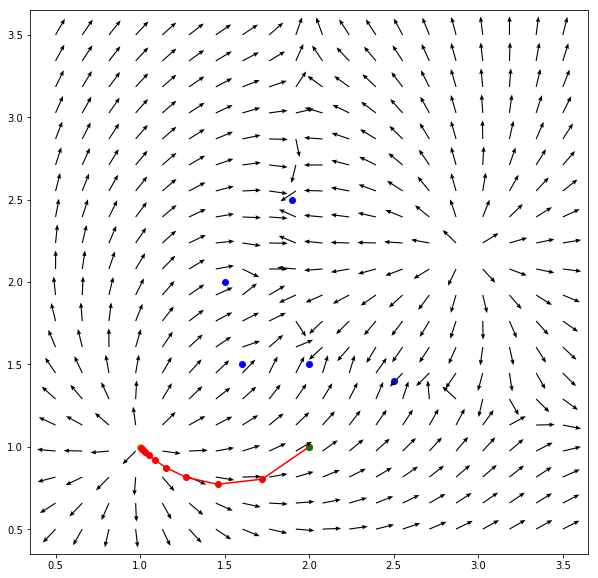

Gradient orientation map


In [295]:
from matplotlib import pyplot as plt
#print beacons and gradient
plt.rcParams['figure.figsize'] = [10, 10]


#variables for gradient orientation map
m, n = 20, 20
min_x, max_x = 0.5, 3.5
min_y, max_y = 0.5, 3.5
x_axis = np.linspace(min_x, max_x, num=m)
y_axis = np.linspace(min_y, max_y, num=n)

# initialise problem
x_true = np.array([[1.0],[1.0]])
b = f(x_true, beacon_pos)

# compute gradient map for current problem
grad_mag = computeGradientOrientationMap(m,n,y_axis, x_axis, beacon_pos)

# compute estimated_x and the intermediate x_list
start_x = np.array([[2.0],[1.0]])
x_computed, x_list = optimiseAndGetSteps(beacon_pos, b, start_x, decrease_coef = 0.4)

# plotting
plt.clf()
plt.scatter(beacon_pos[:,0], beacon_pos[:,1], c='b')
plt.scatter(x_true[0,0], x_true[1,0], c='y')

plt.scatter(x_list[0,:],x_list[1,:], c='r')
plt.plot(x_list[0,:], x_list[1,:], c='r')

plt.scatter(start_x[0,0], start_x[1,0], c = 'g')

for i in range(m):
    for j in range(n):
        plt.quiver(x_axis[i], y_axis[j], grad_mag[j, i, 0], grad_mag[j,i,1], width=0.002, headwidth=4, scale=30)

plt.show()
print "Gradient orientation map"

In [296]:
def computeErrorMap(m,n,y_axis, x_xis, beacon_pos, measurements):
    error_map = np.zeros((m, n))
    for idx_i, i in enumerate(y_axis):
        for idx_j, j  in enumerate(x_axis):
            x0 = np.array([[j],[i]])
            fx = f(x0, beacon_pos)
            error = np.linalg.norm(fx - measurements)
            error_map[idx_i,idx_j] = error
    return error_map

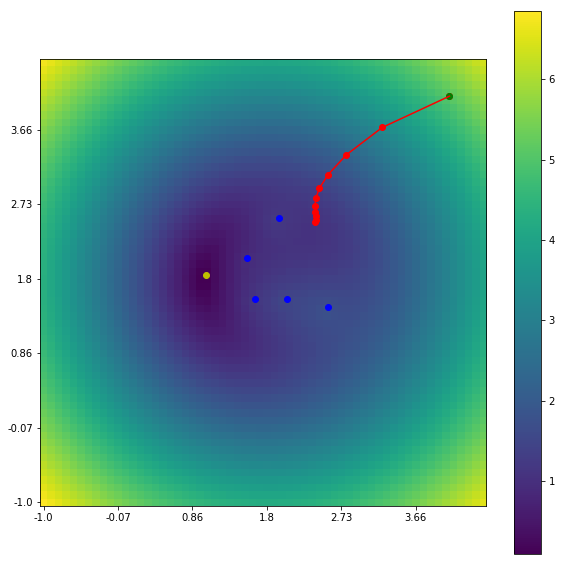

Error magnitude map


In [309]:
from matplotlib import pyplot as plt
#print beacons and gradient
plt.rcParams['figure.figsize'] = [10, 10]


#variables for gradient orientation map
m, n = 60, 60
min_x, max_x = -1.0, 4.5
min_y, max_y = -1.0, 4.5
x_axis = np.linspace(min_x, max_x, num=m)
y_axis = np.linspace(min_y, max_y, num=n)

# initialise problem
x_true = np.array([[1.0],[1.8]])
b = f(x_true, beacon_pos)
noise = np.random.rand(*(b.shape))
#b += noise * 0.1

# compute gradient map for current problem
error_map = computeErrorMap(m,n,y_axis, x_axis, beacon_pos, b)

# compute estimated_x and the intermediate x_list
start_x = np.array([[4.0],[4.0]])
x_computed, x_list = optimiseAndGetSteps(beacon_pos, b, start_x, decrease_coef = 0.4)

# plotting
plt.clf()
plt.imshow(error_map);
plt.gca().invert_yaxis()
plt.colorbar()


#scale beacon_pos to fit in the image
beacon_pos_scaled = beacon_pos.copy()
x_true_scaled = x_true.copy()
x_list_scaled =x_list.copy()
x_start_scaled = start_x.copy()
beacon_pos_scaled[:,0] = (((beacon_pos_scaled[:,0] - min_x) * (n)) / (max_x - min_x))
beacon_pos_scaled[:,1] = (((beacon_pos_scaled[:,1] - min_y) * (n)) / (max_y - min_y))
x_true_scaled[0,0] = (((x_true_scaled[0,0] - min_x) * (n)) / (max_x - min_x))
x_true_scaled[1,0] = (((x_true_scaled[1,0] - min_x) * (n)) / (max_x - min_x))
x_list_scaled[0,:] = (((x_list_scaled[0,:] - min_x) * (n)) / (max_x - min_x))
x_list_scaled[1,:] = (((x_list_scaled[1,:] - min_y) * (n)) / (max_y - min_y))
x_start_scaled[0,0] = (((x_start_scaled[0,0] - min_x) * (n)) / (max_x - min_x))
x_start_scaled[1,0] = (((x_start_scaled[1,0] - min_x) * (n)) / (max_x - min_x))


plt.scatter(beacon_pos_scaled[:,0], beacon_pos_scaled[:,1], c='b')
plt.scatter(x_true_scaled[0,0], x_true_scaled[1,0], c='y')

plt.scatter(x_list_scaled[0,:],x_list_scaled[1,:], c='r')
plt.plot(x_list_scaled[0,:], x_list_scaled[1,:], c='r')

plt.scatter(x_start_scaled[0,0], x_start_scaled[1,0], c = 'g')

x_axis = np.round_(x_axis, 2)
y_axis = np.round_(y_axis, 2)
plt.xticks(range(0,x_axis.shape[0],10), x_axis[::10])
plt.yticks(range(0,y_axis.shape[0],10), y_axis[::10])

plt.show()
print "Error magnitude map"